### Exploratory Data Analysis — IMDb Movie Dataset by Genre

<img src='https://storage.googleapis.com/kaggle-datasets-images/2907940/5013227/199cb84215cba8e9c127236d7509aae5/dataset-cover.png?t=2023-02-17-04-17-36' width=500 align='left'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob
import os

### Joining all csv files:

In [2]:
path = r'C:\IMDb'
all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df.head()

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN


### Data cleaning

In [3]:
print(df.shape)
df['movie_id'].nunique()

(368300, 14)


243197

In [4]:
df.drop_duplicates(subset=['movie_id'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243197 entries, 0 to 368299
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movie_id     243197 non-null  object 
 1   movie_name   243197 non-null  object 
 2   year         204290 non-null  object 
 3   certificate  55170 non-null   object 
 4   runtime      159713 non-null  object 
 5   genre        243197 non-null  object 
 6   rating       138690 non-null  float64
 7   description  243197 non-null  object 
 8   director     222358 non-null  object 
 9   director_id  222358 non-null  object 
 10  star         198851 non-null  object 
 11  star_id      204108 non-null  object 
 12  votes        138692 non-null  float64
 13  gross(in $)  12002 non-null   float64
dtypes: float64(3), object(11)
memory usage: 27.8+ MB


In [6]:
df.isna().sum()

movie_id            0
movie_name          0
year            38907
certificate    188027
runtime         83484
genre               0
rating         104507
description         0
director        20839
director_id     20839
star            44346
star_id         39089
votes          104505
gross(in $)    231195
dtype: int64

In [7]:
df_clean = df[df['runtime'].notna() & df['rating'].notna() & df['votes'].notna() & df['year'].notna()].copy()
df_clean.head(3)

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN


In [8]:
df_clean['runtime'] = df_clean['runtime'].replace({'min': '', ',': ''},regex=True).astype(int)

In [9]:
df_clean.rename(columns={'runtime': 'runtime, min'}, inplace=True)
df_clean['star'] = df_clean['star'].str.replace('\n', '')
df_clean.head(3)

,movie_id,movie_name,year,certificate,"runtime, min",genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, Lupita Nyong'o, Danai Gurira, ...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, Mike Colter, Tony Goldwyn, Yoso...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN


In [10]:
df_clean['year'] = df_clean['year'].astype(str)

In [11]:
df_clean.loc[~df_clean['year'].str.isdigit(), 'year']

187060     I
336171    II
Name: year, dtype: object

In [12]:
df_clean = df_clean.loc[df_clean['year'].str.isdigit()]

In [13]:
df_clean['year'] = df_clean['year'].astype(int)

### Finding main genre in every movie

In [14]:
df_clean['main_genre'] = df_clean['genre'].apply(lambda x: x.split(',')[0])
df_clean.head(3)

,movie_id,movie_name,year,certificate,"runtime, min",genre,rating,description,director,director_id,star,star_id,votes,gross(in $),main_genre
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, Lupita Nyong'o, Danai Gurira, ...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN,Action
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN,Action
2,tt5884796,Plane,2023,R,107,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, Mike Colter, Tony Goldwyn, Yoso...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN,Action


### Plots

Let's see if there is any strong correlation between numerical variables

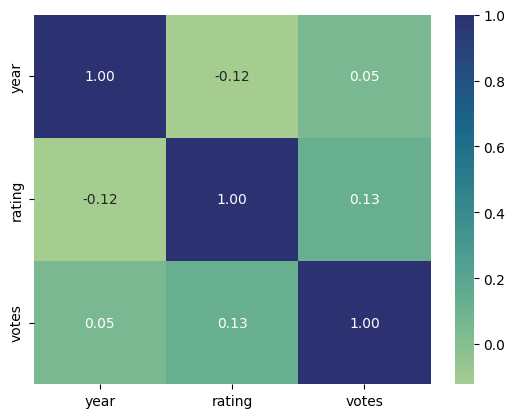

In [15]:
corr = df_clean[['year', 'rating', 'votes']].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='crest');

Rounding votes:

In [16]:
df_votes = pd.DataFrame(round(df_clean['votes'], -3))
df_votes = df_votes[df_votes['votes'] > 25_000]

def round_votes(x):
    k = 0
    while True:
        if 25_000 + 50_000*k <= x < 75_000 + 50_000*k:
            return 25_000 + 50_000*k
        k = k + 1

df_votes['votes'] = df_votes['votes'].apply(round_votes)
df_votes.describe().applymap('{:.3f}'.format)

,votes
count,5312.000
mean,122477.410
std,196979.258
min,25000.000
25%,25000.000
50%,25000.000
75%,125000.000
max,2675000.000


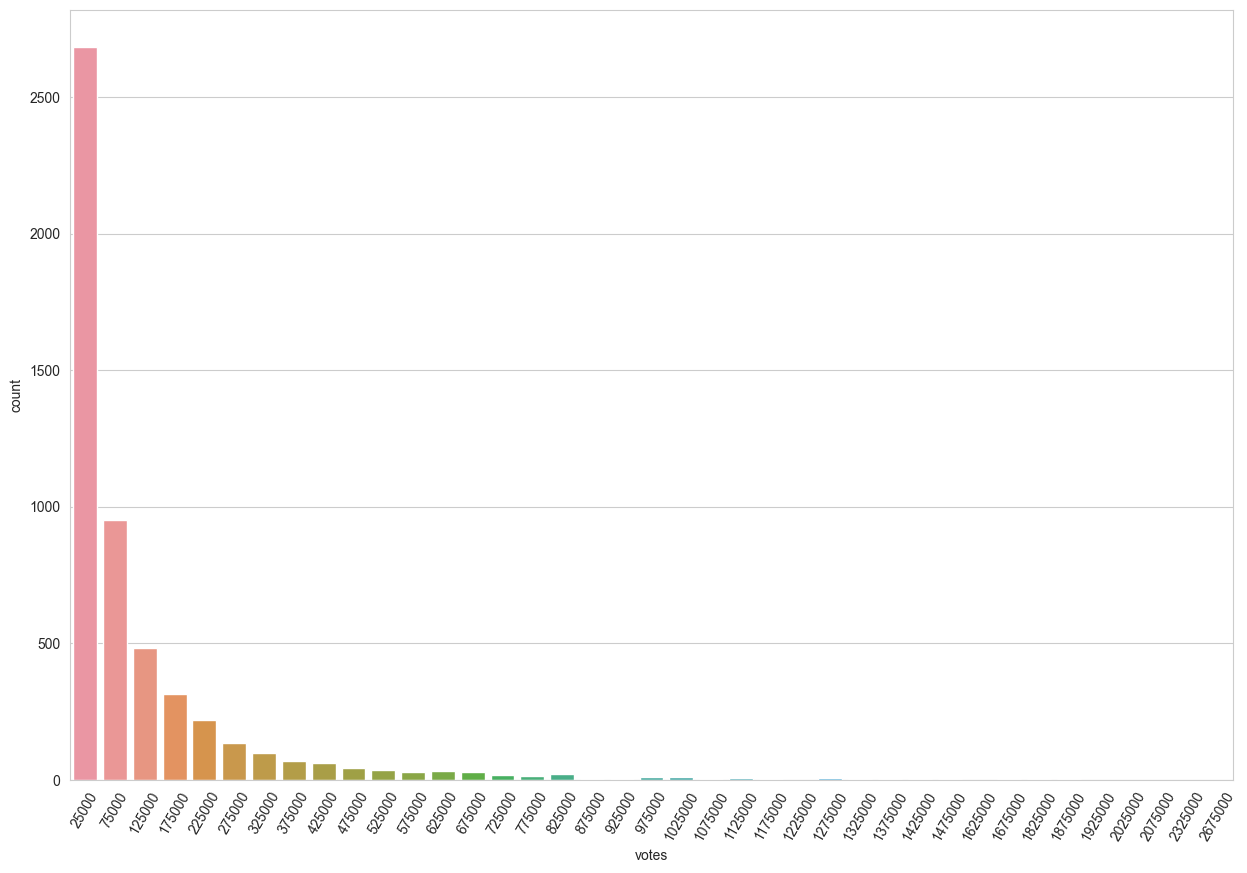

In [17]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.countplot(data=df_votes, x=df_votes['votes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=10);

Let's see if rating follows a normal distribution

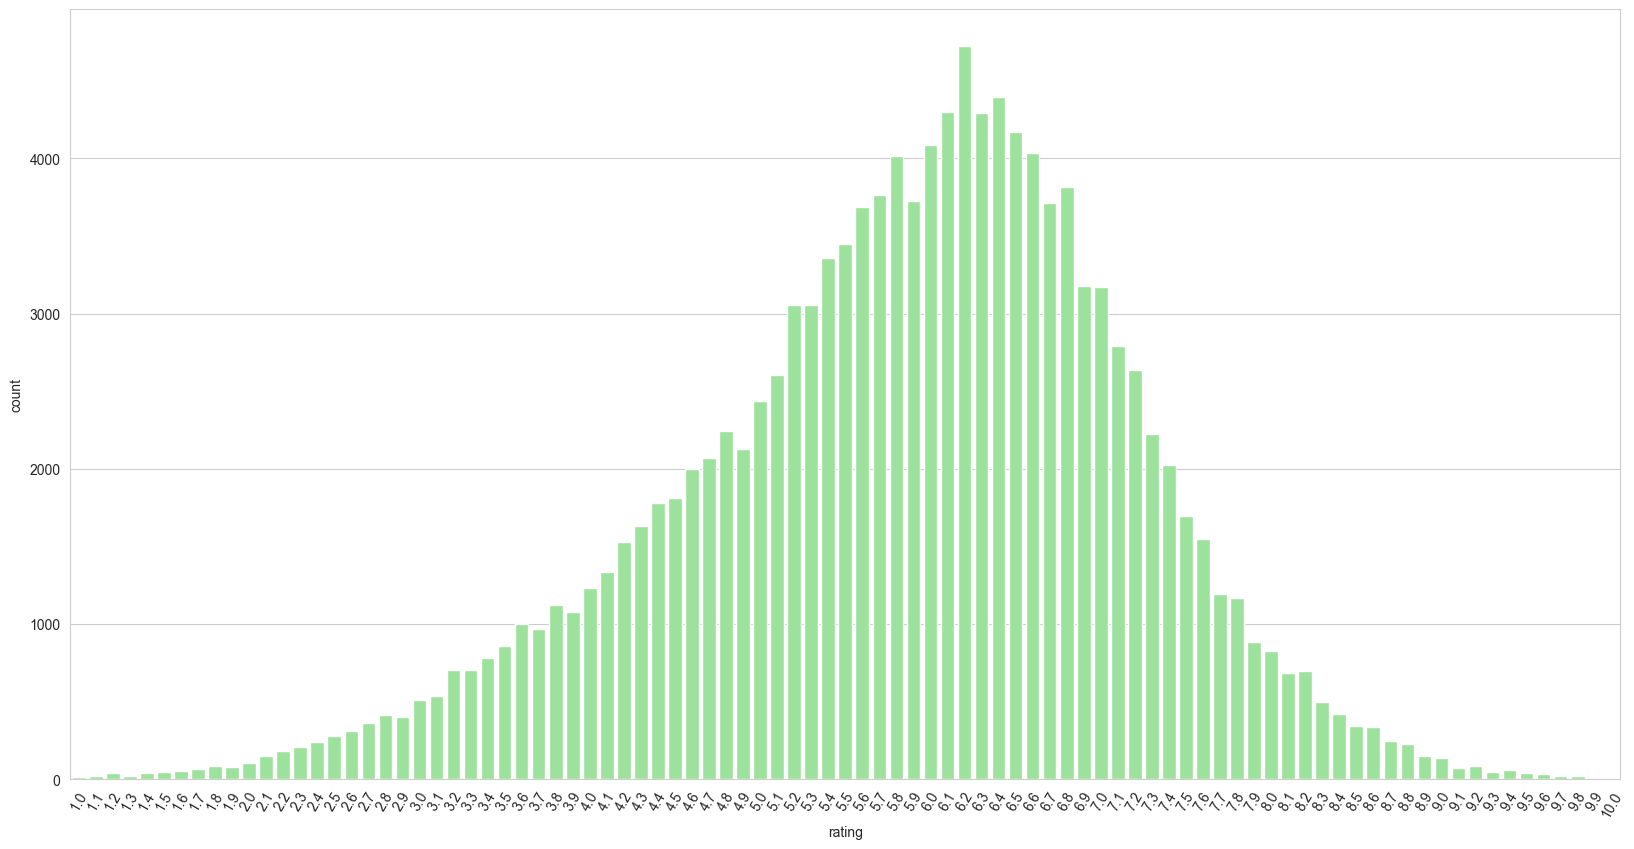

In [18]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(data=df_clean, x=df_clean['rating'], color='lightgreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=10);

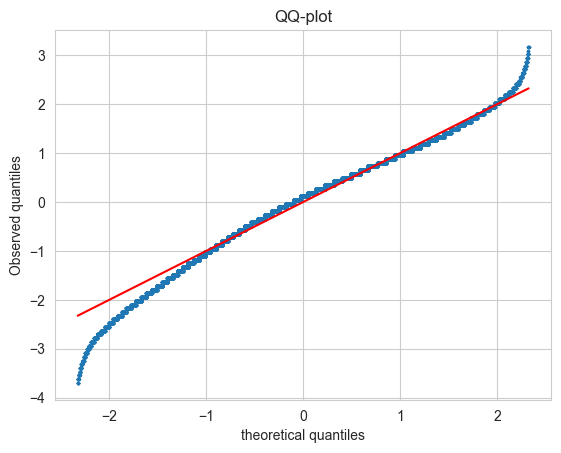

In [19]:
def plot_qq(data):
        mean, std = np.mean(data), np.std(data)
        z_scores = (data - mean) / std
        sorted_z_scores = np.sort(z_scores)
        theoretical_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(data)))
        
        plt.scatter(theoretical_quantiles, sorted_z_scores, s=2)
        plt.plot([np.min(theoretical_quantiles), np.max(theoretical_quantiles)], [np.min(theoretical_quantiles), np.max(theoretical_quantiles)], color='red')
        plt.xlabel("theoretical quantiles")
        plt.ylabel("Sample quantiles")
        plt.title("QQ-plot")
        plt.show()

plot_qq(df_clean['rating'])

As it can be seen, rating's distribution has fat tails

In [20]:
Top_250 = df_clean.loc[df_clean['votes'] >= 25_000, ['movie_name', 'rating', 'description', 'director','star', 'votes']].sort_values(by='rating', ascending=False).reset_index(drop=True)[:250]
Top_250.head(10)

,movie_name,rating,description,director,star,votes
0,The Godfather,9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1875646.0
1,The Lord of the Rings: The Return of the King,9.0,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",1860374.0
2,Mirror Game,9.0,Ayna is an actor and the prison is his stage. ...,Amitabh Reza Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila, Part...",27325.0
3,12 Angry Men,9.0,The jury in a New York City murder trial is fr...,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",798065.0
4,The Godfather Part II,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",1281423.0
5,The Dark Knight,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2675531.0
6,Schindler's List,9.0,"In German-occupied Poland during World War II,...",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",1369752.0
7,Pulp Fiction,8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",2074027.0
8,777 Charlie,8.9,Dharma is stuck in a rut with his negative and...,Kiranraj K,"Rakshit Shetty, Charlie, Sangeetha Sringeri, R...",33293.0
9,The Lord of the Rings: The Two Towers,8.8,While Frodo and Sam edge closer to Mordor with...,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",1679818.0


In [21]:
def round_time(x):
    k = 0
    while True:
        if 5*k <= x < 5*k + 5:
            return 5*k
        k = k + 1

df_time = pd.DataFrame(df_clean['runtime, min'].apply(round_time))
df_time.head()

,"runtime, min"
0,160
1,190
2,105
3,135
5,125


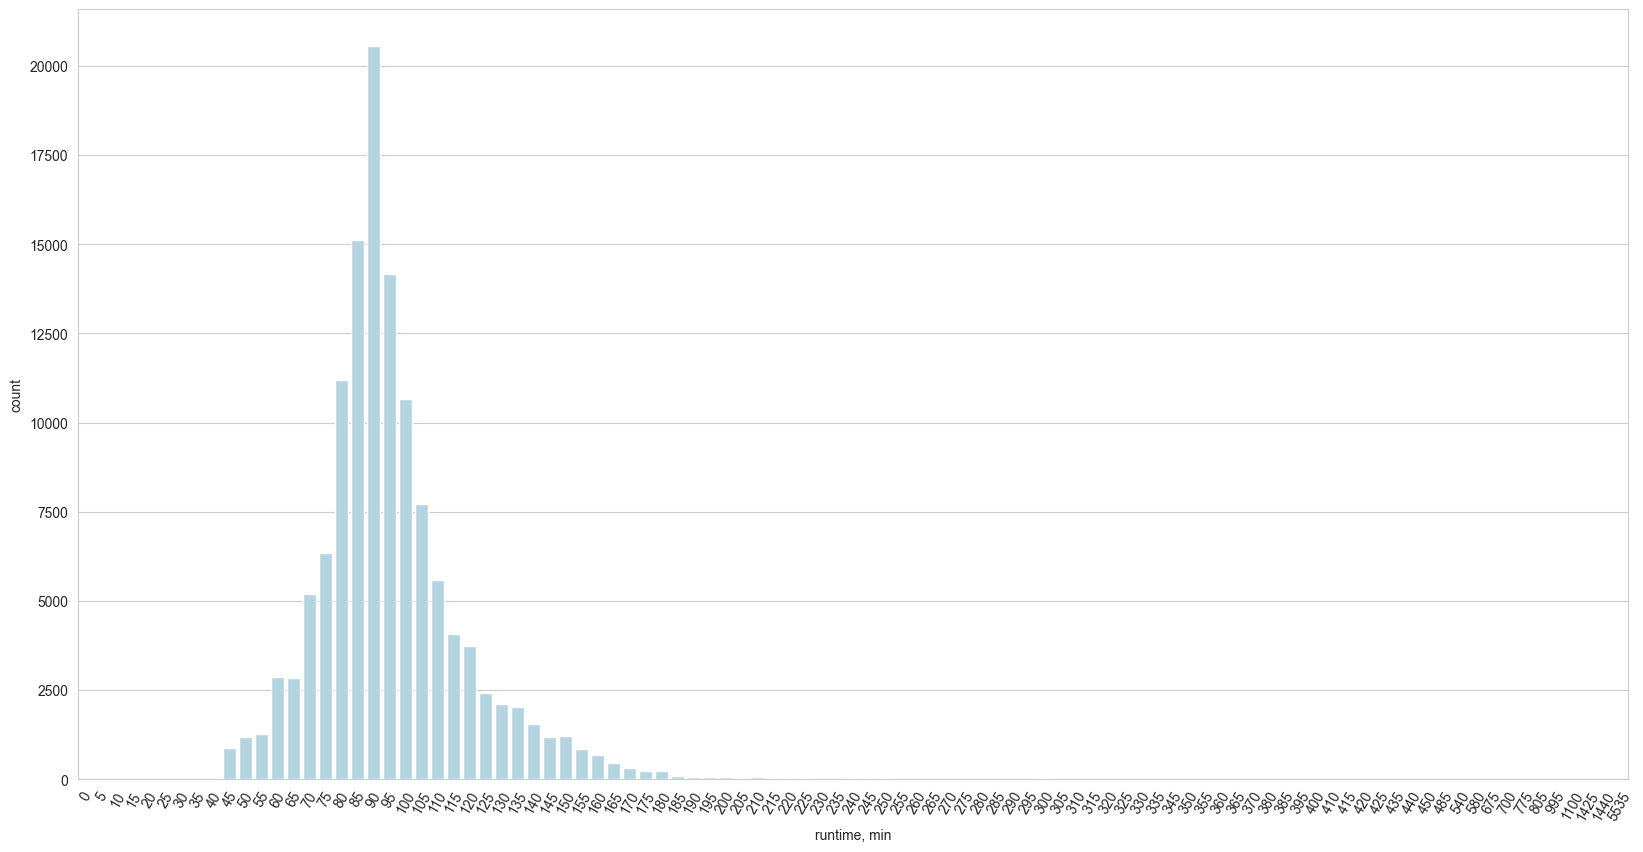

In [22]:
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(data=df_time, x=df_time['runtime, min'], color='lightblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=10);

Most popular runtime of movies ≈ 85-95 min

In [23]:
df_clean.groupby('main_genre').size().sort_values(ascending=False)

main_genre
Drama         26793
Action        24929
Comedy        22594
Crime         12158
Horror        10376
Adventure      8728
Animation      4385
Thriller       3836
Biography      3667
Romance        2613
Family         1942
Mystery        1372
Fantasy        1355
Sci-Fi         1014
War             449
Musical         390
History         343
Sport           142
Music           121
Film-Noir        33
Western          29
Adult             3
Reality-TV        2
dtype: int64

'Reality-TV' and 'Adult' don't have enough amount of samples, so we are getting rid of them

In [24]:
df_clean = df_clean.loc[~df_clean['main_genre'].isin(['Reality-TV','Adult'])]

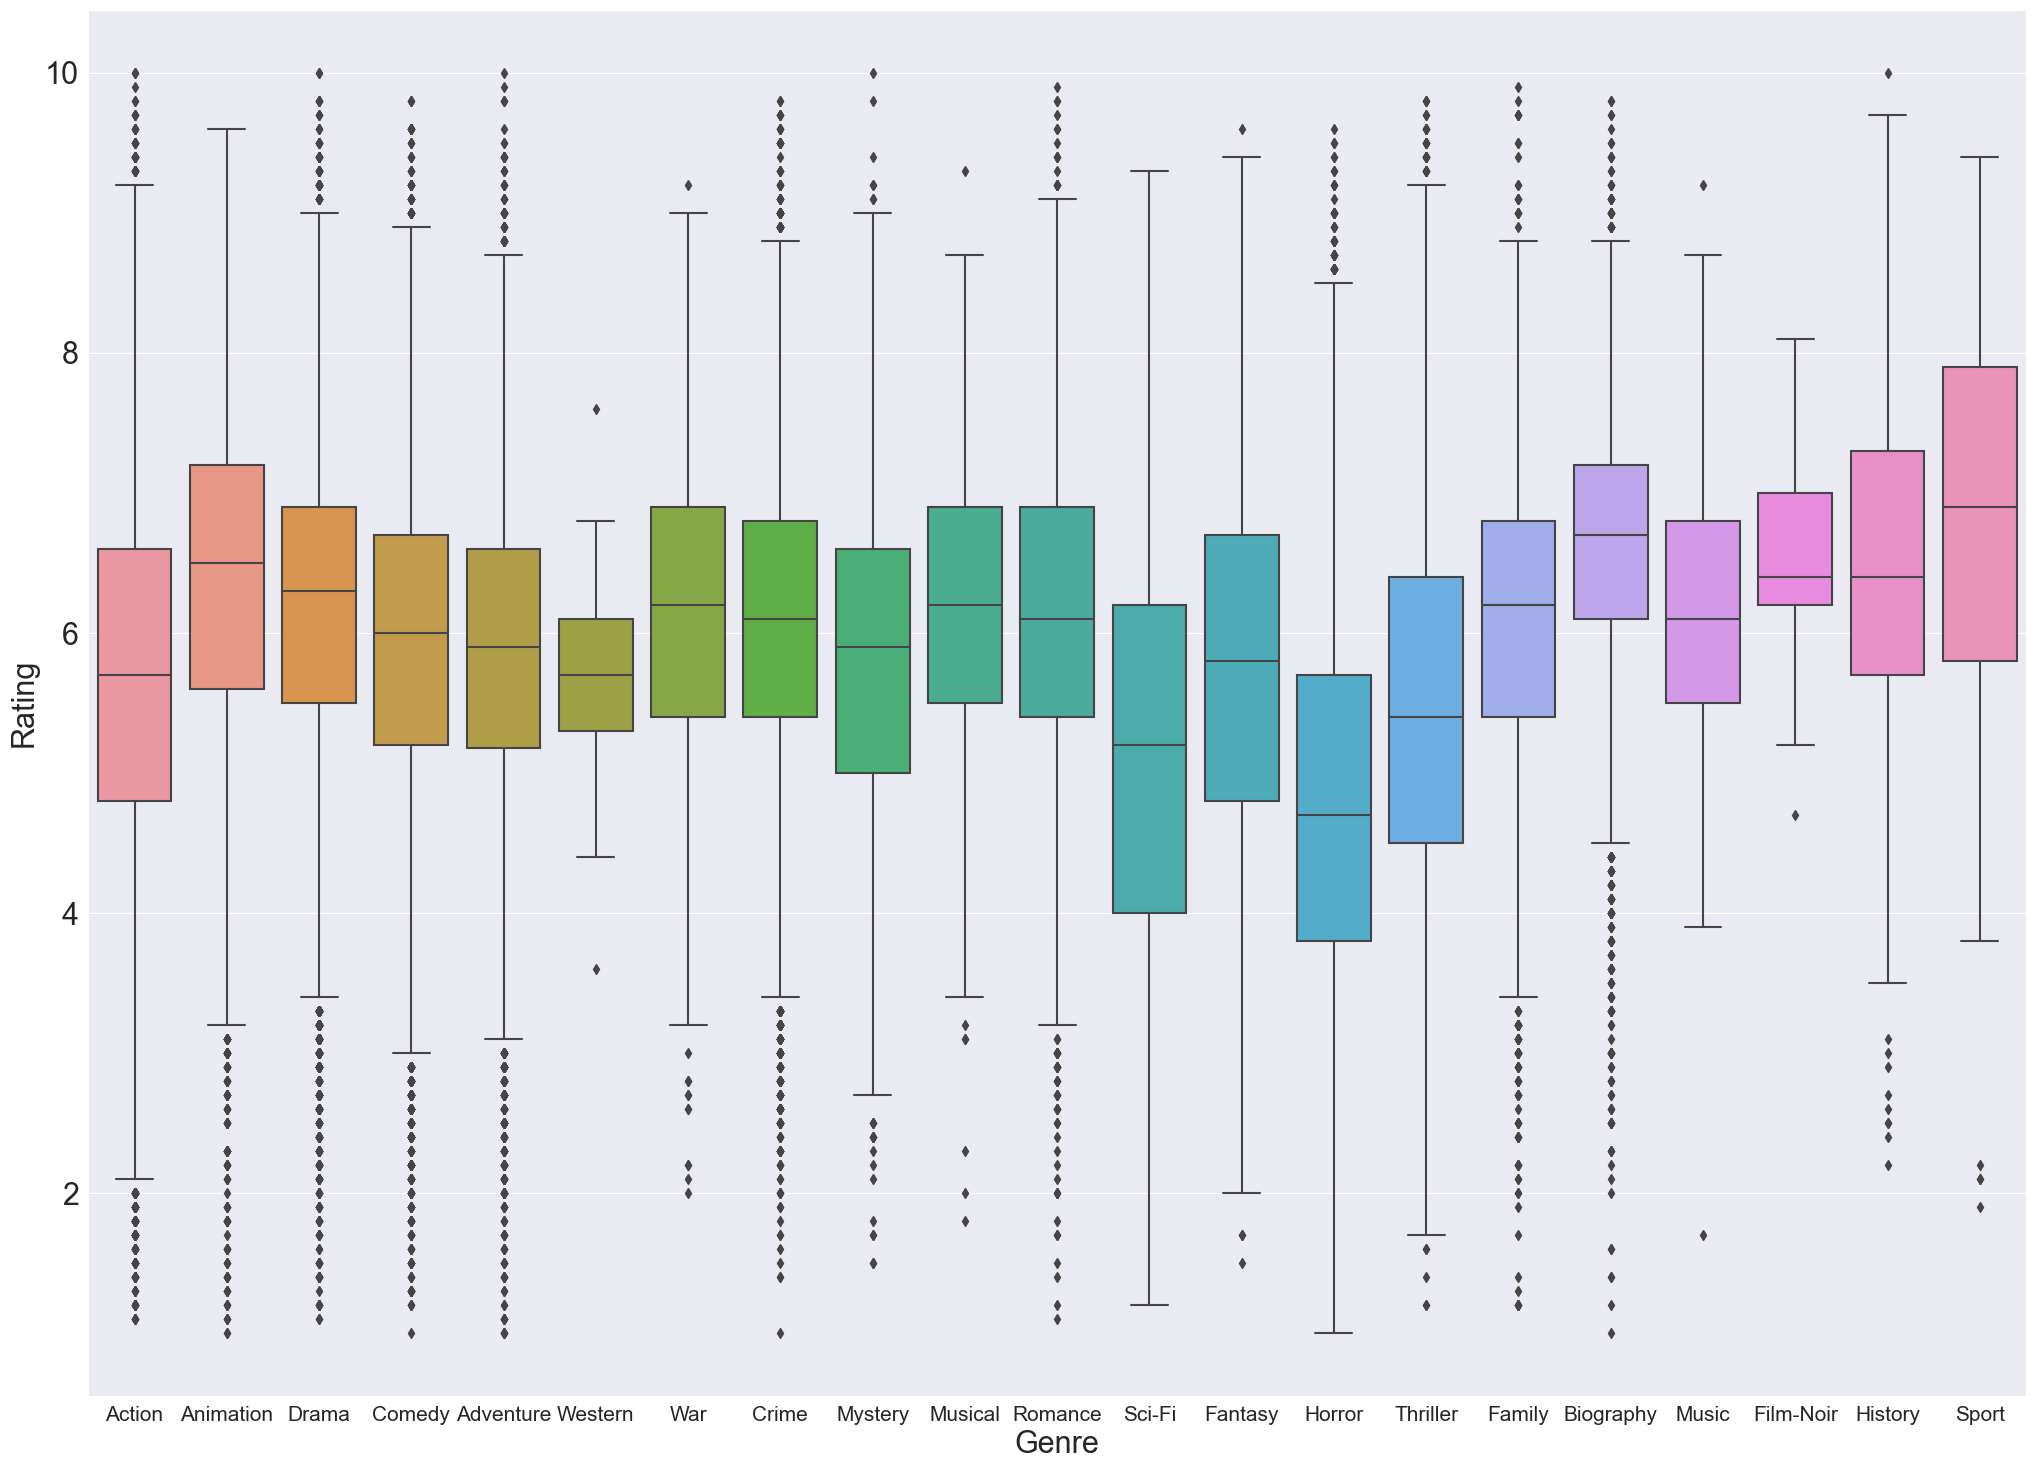

In [25]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=df_clean, x='main_genre', y='rating')
ax.set_xlabel('Genre', fontsize=22)
ax.set_ylabel('Rating', fontsize=22)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=22)
plt.show()

### Building a movie recommender

In [26]:
Top_5000 = df_clean.loc[df_clean['votes'] >= 25_000, ['movie_name', 'rating', 'description', 'director','star', 'votes']].sort_values(by='rating', ascending=False).reset_index(drop=True)[:5000]

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Top_5000['description'])
tfidf_matrix.shape

(5000, 13534)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [28]:
indices = pd.Series(Top_5000.index, index=Top_5000['movie_name']).drop_duplicates()

In [29]:
cosine_sim_df = pd.DataFrame(cosine_sim)
cosine_sim_df.columns = indices.index
cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')
cosine_sim_df.head()

movie_name,The Godfather,The Lord of the Rings: The Return of the King,Mirror Game,12 Angry Men,The Godfather Part II,The Dark Knight,Schindler's List,Pulp Fiction,777 Charlie,The Lord of the Rings: The Two Towers,...,Twilight,What Men Want,Hollywood Homicide,Daredevil,The Watcher,Resident Evil: Retribution,Bachelorette,One for the Money,Loser,The Nun
title,,,,,,,,,,,,,,,,,,,,,
The Godfather,1.000000,0.0,0.0,0.064026,0.130392,0.0,0.000000,0.0,0.014743,0.013595,...,0.0,0.000000,0.000000,0.037091,0.00000,0.0,0.0,0.0,0.0,0.0
The Lord of the Rings: The Return of the King,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.016102,0.0,0.000000,0.196745,...,0.0,0.033717,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
Mirror Game,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.084400,0.000000,0.000000,0.05327,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.064026,0.0,0.0,1.000000,0.062009,0.0,0.000000,0.0,0.013358,0.012318,...,0.0,0.000000,0.032825,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
The Godfather Part II,0.130392,0.0,0.0,0.062009,1.000000,0.0,0.000000,0.0,0.028653,0.013167,...,0.0,0.000000,0.000000,0.035923,0.00000,0.0,0.0,0.0,0.0,0.0


In [30]:
def get_recommendations(title, cosine_sim=cosine_sim_df):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return Top_5000['movie_name'].iloc[movie_indices]

get_recommendations('The Godfather')

3412                Dead Man Down
491                    Knives Out
3367    Gremlins 2: The New Batch
3470          Luckiest Girl Alive
4377           Punisher: War Zone
4           The Godfather Part II
3660                  The Rebound
4007             How to Be Single
2070          A Most Violent Year
4704               New Year's Eve
Name: movie_name, dtype: object